In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
defaulter_df = pd.read_csv("./data/Default.csv")
defaulter_df.head()

,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [4]:
print("Size of the data : ", defaulter_df.shape)

Size of the data :  (10000, 4)


In [5]:
print("Target variable frequency distribution : \n", defaulter_df["default"].value_counts())

Target variable frequency distribution : 
 No     9667
Yes     333
Name: default, dtype: int64


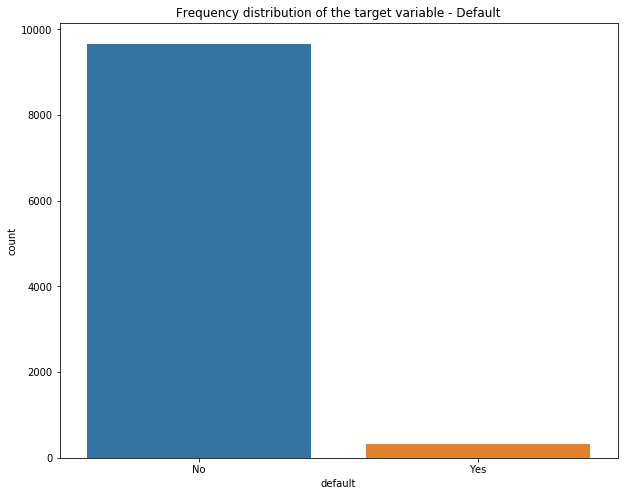

In [6]:
plt.figure(figsize = (10,8))
sns.countplot(defaulter_df["default"])
plt.title("Frequency distribution of the target variable - Default")
plt.show()

In [7]:
X = defaulter_df[["balance", "income"]]
y = defaulter_df["default"]

#### Train-test Split

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [10]:
print("Size of training data : ", X_train.shape[0])
print("Size of test data : ", X_test.shape[0])

Size of training data :  8000
Size of test data :  2000


#### Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
min_max = MinMaxScaler()
min_max.fit(X_train)
train_transformed = min_max.transform(X_train)
transformed = min_max.transform(X_test)
transformed

array([[0.54087734, 0.42228861],
       [0.29076698, 0.56836789],
       [0.        , 0.28904364],
       ...,
       [0.01028582, 0.33358208],
       [0.50821105, 0.27614282],
       [0.11254081, 0.67068403]])

In [13]:
X_train["balance_normalized"] = train_transformed[:,0]
X_train["income_normalized"] = train_transformed[:,1]
X_train.head()

,balance,income,balance_normalized,income_normalized
9254,1018.568130,34103.87952,0.383739,0.457967
1561,62.170050,28660.74751,0.023422,0.383181
1670,1046.743543,40822.44741,0.394354,0.550278
6087,763.735280,44125.71873,0.287733,0.595664
6669,697.248633,25730.91758,0.262684,0.342926


In [14]:
X_test["balance_normalized"] = transformed[:,0]
X_test["income_normalized"] = transformed[:,1]
X_test.head()

,balance,income,balance_normalized,income_normalized
6252,1435.662933,31507.08928,0.540877,0.422289
4684,771.789347,42139.07027,0.290767,0.568368
1731,0.000000,21809.21851,0.000000,0.289044
4742,113.571264,32803.83265,0.042787,0.440105
4521,1358.132472,49903.59708,0.511668,0.675049


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [39]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train[["balance_normalized","income_normalized"]], y_train)
predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.964

In [40]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

In [41]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,1912,19
Yes,53,16


In [43]:
16/(16+19)

0.45714285714285713

In [42]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.97      0.99      0.98      1931
         Yes       0.46      0.23      0.31        69

    accuracy                           0.96      2000
   macro avg       0.72      0.61      0.64      2000
weighted avg       0.96      0.96      0.96      2000



### Sampling techniques to handle imbalanced dataset

#### 1. UnderSampling (DownSampling)

In [18]:
from imblearn.under_sampling import RandomUnderSampler

In [20]:
print("Before undersampling: \n", y_train.value_counts())

Before undersampling: 
 No     7736
Yes     264
Name: default, dtype: int64


In [21]:
under_sampling = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_train_under, y_train_under  = under_sampling.fit_resample(X_train, y_train)

In [22]:
print("After undersampling: \n", y_train_under.value_counts())

After undersampling: 
 Yes    264
No     264
Name: default, dtype: int64


In [23]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_under[["balance_normalized","income_normalized"]], y_train_under)
predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.8215

In [ ]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

In [24]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       1.00      0.82      0.90      1931
         Yes       0.15      0.91      0.26        69

    accuracy                           0.82      2000
   macro avg       0.57      0.87      0.58      2000
weighted avg       0.97      0.82      0.88      2000



#### 2. OverSampling (UpSampling)

In [25]:
from imblearn.over_sampling import RandomOverSampler

In [26]:
print("Before oversampling: \n", y_train.value_counts())

Before undersampling: 
 No     7736
Yes     264
Name: default, dtype: int64


In [27]:
over_sampling = RandomOverSampler(random_state=42)
X_train_over, y_train_over  = over_sampling.fit_resample(X_train, y_train)

In [28]:
print("After oversampling: \n", y_train_over.value_counts())

After oversampling: 
 Yes    7736
No     7736
Name: default, dtype: int64


In [44]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_over[["balance_normalized","income_normalized"]], y_train_over)
predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.929

In [45]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,1822,109
Yes,33,36


In [30]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.98      0.94      0.96      1931
         Yes       0.25      0.52      0.34        69

    accuracy                           0.93      2000
   macro avg       0.62      0.73      0.65      2000
weighted avg       0.96      0.93      0.94      2000



#### 3. SMOTE (Synthetic Minority Oversampling Technique)

In [31]:
from imblearn.over_sampling import SMOTE

In [32]:
print("Before SMOTE: \n", y_train.value_counts())

Before SMOTE: 
 No     7736
Yes     264
Name: default, dtype: int64


In [33]:
smote = SMOTE()
X_train_smote, y_train_smote  = smote.fit_resample(X_train, y_train)

In [34]:
print("After SMOTE: \n", y_train_smote.value_counts())

After SMOTE: 
 Yes    7736
No     7736
Name: default, dtype: int64


In [47]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(X_train_smote[["balance_normalized","income_normalized"]], y_train_smote)
predictions = knn.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.8795

In [48]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,1704,227
Yes,14,55


In [49]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.99      0.88      0.93      1931
         Yes       0.20      0.80      0.31        69

    accuracy                           0.88      2000
   macro avg       0.59      0.84      0.62      2000
weighted avg       0.96      0.88      0.91      2000



### Adjusting the class weights internally

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
log_clf = LogisticRegression()
log_clf.fit(X_train[["balance_normalized","income_normalized"]], y_train)
predictions = log_clf.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9675

In [52]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,1926,5
Yes,60,9


In [53]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.97      1.00      0.98      1931
         Yes       0.64      0.13      0.22        69

    accuracy                           0.97      2000
   macro avg       0.81      0.56      0.60      2000
weighted avg       0.96      0.97      0.96      2000



In [54]:
log_clf_balanced = LogisticRegression(class_weight = "balanced")
log_clf_balanced.fit(X_train[["balance_normalized","income_normalized"]], y_train)
predictions = log_clf_balanced.predict(X_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.869

In [55]:
cm = confusion_matrix(y_test, predictions)
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,1678,253
Yes,9,60


In [56]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.99      0.87      0.93      1931
         Yes       0.19      0.87      0.31        69

    accuracy                           0.87      2000
   macro avg       0.59      0.87      0.62      2000
weighted avg       0.97      0.87      0.91      2000

